# Demonstration notebook for how to use the Twin Autoencoder.
 
For use, we assume that you have:
1. The Data
2. The Embedding

In this notebook we created the embeddings with SPUD and MASH. You can find their publically available code here:

https://github.com/rustadadam/mashspud

## Data Loading and Autoencoder Fit

Note: For information on the arguments used to create the embeddings, you can find them at the demonstration_utils/diabetes/info.json. You can visit the paper linked above for more description.

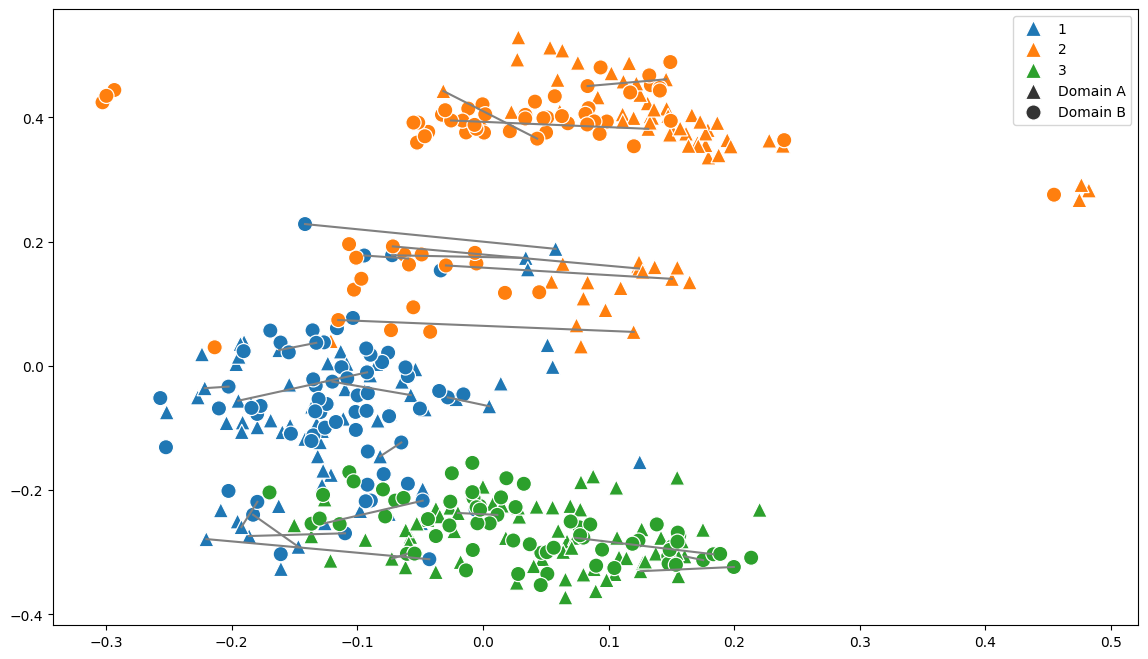

In [3]:
from helpers import *
from testing_grounds import *
import numpy as np
PATH = "demonstration_utils/"
np.set_printoptions(precision=20, suppress=False)

#Load in Seeds data
seeds = np.load(PATH + "seeds/emb.npy")
anchors = np.load(PATH + "seeds/anchors.npy")
labels = np.load(PATH + "seeds/labels.npy")

plot_embeddings(seeds, np.hstack([labels, labels]), anchors)

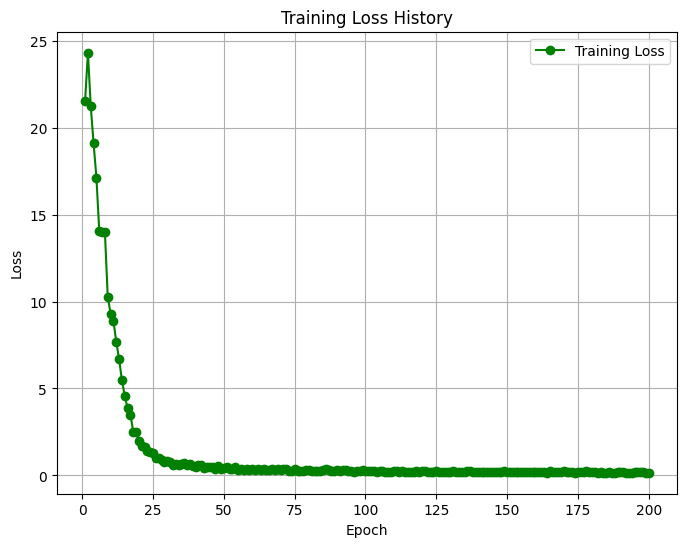

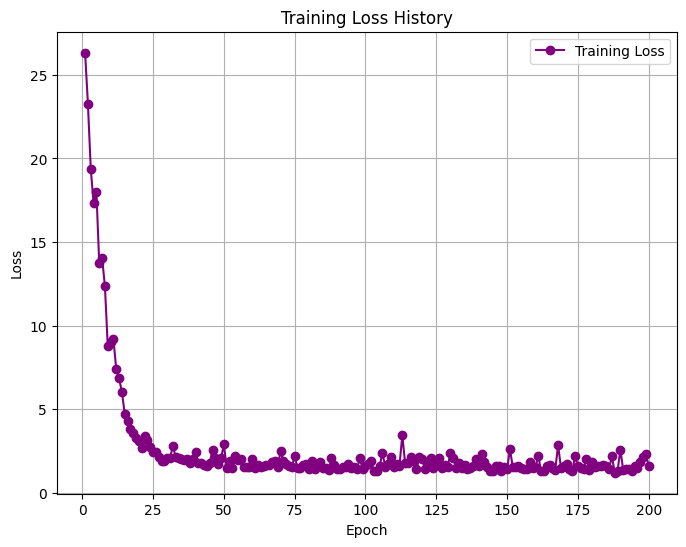

In [7]:
# First, we need to train the autoencoder
from AutoEncoders import GRAEAnchor

# Load in the data
train_emb = np.load(PATH + "seeds/train_emb.npy") 
trainA = np.load(PATH + "seeds/trainA.npy")
trainB = np.load(PATH + "seeds/trainB.npy")
testA = np.load(PATH + "seeds/testA.npy")
testB = np.load(PATH + "seeds/testB.npy")

train_labels = np.load(PATH + "seeds/train_labels.npy")
test_labels = np.load(PATH + "seeds/test_labels.npy")

# Train the autoencoders
AutoEncA = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2) #NOTE: try changing anchor_lam to other values! 
AutoEncA.fit(trainA, train_emb, anchors)

AutoEncB = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEncB.fit(trainB, train_emb, anchors)


AutoEncA.plot_loss(color = "green")
AutoEncB.plot_loss(color = "purple")
plt.show()


In [8]:
print(type(train_emb))
print(np.min(train_emb))
print(np.max(train_emb))

<class 'numpy.ndarray'>
-0.3622587948719542
0.6427492551548916


In [9]:
def mod_anchors_A(Anchor_list,remove_points):
    #This program is expecting both lists to be numpy lists and to have two dimensions.
    sort_anchors=np.sort(Anchor_list[0])
    sort_remove=np.sort(remove_points)
    for x in range(len(sort_anchors)):
        for y in range(len(sort_remove)):
            if sort_anchors[x,0]>=sort_remove[y]:
                sort_anchors[x,0]=sort_anchors[x,0]-1
    return(np.sort(sort_anchors))

In [10]:
def mod_anchors_B(Anchor_list,remove_points):
    anchors=Anchor_list[0]
    #This program is expecting both lists to be numpy lists and to have two dimensions.
    sort_anchors = anchors[anchors[:, 1].argsort()]
    sort_remove=np.sort(remove_points)
    for x in range(len(sort_anchors)):
        for y in range(len(sort_remove)):
            if sort_anchors[x,1]>=sort_remove[y]:
                sort_anchors[x,1]=sort_anchors[x,1]-1
    return(sort_anchors)

In [11]:
points_A=[10,20,6,5]
points_B=[33,18,26,15]
print(anchors.shape)


(25, 2)


In [12]:
mod_anchors_B(Anchor_list=[mod_anchors_A(Anchor_list=[anchors],remove_points=points_A)],remove_points=points_B)

array([[  5,   6],
       [  5,   7],
       [  6,   8],
       [ 19,  20],
       [ 19,  21],
       [ 22,  24],
       [ 24,  25],
       [ 31,  32],
       [ 46,  46],
       [ 51,  51],
       [ 52,  52],
       [ 53,  53],
       [ 55,  55],
       [ 58,  58],
       [ 66,  66],
       [ 67,  67],
       [103, 103],
       [104, 104],
       [110, 110],
       [125, 125],
       [135, 135],
       [139, 139],
       [146, 146],
       [147, 147],
       [150, 150]])

In [13]:
print(np.min(anchors))
print(np.max(anchors))
# print(anchors)
print(np.sort(anchors, axis=0))
type(anchors)

6
154
[[  6   6]
 [  7   7]
 [  8   8]
 [ 22  22]
 [ 23  23]
 [ 26  26]
 [ 28  28]
 [ 35  35]
 [ 50  50]
 [ 55  55]
 [ 56  56]
 [ 57  57]
 [ 59  59]
 [ 62  62]
 [ 70  70]
 [ 71  71]
 [107 107]
 [108 108]
 [114 114]
 [129 129]
 [139 139]
 [143 143]
 [150 150]
 [151 151]
 [154 154]]


numpy.ndarray

## Standard Predictions
- Can use .transform or .transform_inverse

Reconstruction loss for Test Data A {'MSE': 0.004225799311634381, 'transform_time': 0.005192756652832031, 'rec_time': 0.0}


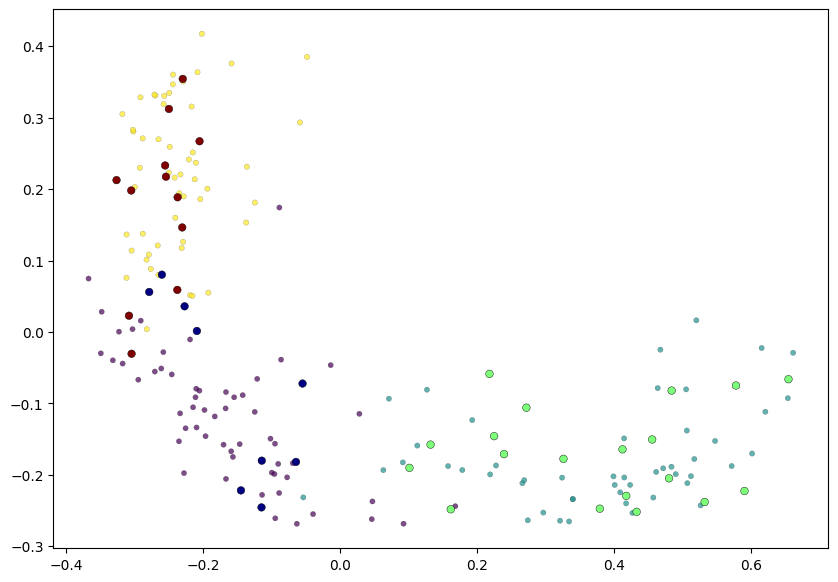

(40, 4)


In [14]:
dataA_len, testA_len = len(trainA), len(testA)
print(f"Reconstruction loss for Test Data A {AutoEncA.score(testA)[1]}")
AutoEncA.plot(trainA, train_labels[:dataA_len], testA, test_labels[:testA_len])
print(testA.shape)

In [15]:
#Accessing individual parts of Z

testing = AutoEncA.score(testA)[1]
print(testing)

mse=testing['MSE']
# print(mse)
#We've isolated MSE with this code above.

first_dimension=testA.shape[0]
print(first_dimension)

a_thing=mse/first_dimension
# print(a_thing)

print(trainA[1])
print(testA[1])
print(testA[1][0])
#This gives us the values of the tuple one at a time, now we need to be able to calculate the meansquared value for the loss function

{'MSE': 0.004225799311634381, 'transform_time': 0.002861499786376953, 'rec_time': 0.0015268325805664062}
40
[0.2413144544960861 0.3749109052031362 0.2975206611570247
 0.3244707040866568]
[0.5919151247036385  0.5367070563079115  0.2933884297520661
 0.12900049236829128]
0.5919151247036385


In [16]:
#Okay the code bellow finds the loss value of the thing we're finding(don't remember the actually name).  Now I think we need to figure out the limit for removing
#a point.  We'll ask Adam.

values=[]
mse_s=[]
# After running first time clear array
for y in range(testA.shape[0]):
    for x in range(testA.shape[1]):
        test_val=testA[y][x]
        train_val=trainA[y][x]
        point_val=abs(train_val-test_val)
        #print(point_val)
        values.append(point_val)
        if x==testA.shape[1]-1:
            mse_one=(values[0]+values[1]+values[2]+values[3])/4
            mse_s.append(mse_one)
            #print(f"MSE for block {mse_one}")
            for x in range(len(values)):
                values.pop()

# mse_one=(values[0]+values[1]+values[2]+values[3])/4
# print(mse_one)
print(len(mse_s))

40


In [17]:
import statistics

needed_value=statistics.median(mse_s)
print(needed_value)

#Values we'll be using: 5 20 6 22

0.2616117807648968


In [18]:
for x in range(len(mse_s)):
    if mse_s[x]<=0.28 and mse_s[x]>=0.25:
        print(mse_s[x], x)

0.26670293101024206 5
0.27583493534794545 6
0.2797966101139302 10
0.25652063051955143 20
0.25484076469073724 22


In [19]:
temporray_list=list(testA)

print(temporray_list)
# popping=temporray_list.pop()
# print(popping)

#With how indexing works we have to go back to front with removal.
del temporray_list[22]
del temporray_list[21]
del temporray_list[20]
del temporray_list[6]
del temporray_list[5]

temporray_train=list(trainA)
del temporray_train[22]
del temporray_train[21]
del temporray_train[20]
del temporray_train[6]
del temporray_train[5]

Re_trainA=np.array(temporray_train)
Re_testA=np.array(temporray_list)
print(len(Re_testA))
print(len(Re_trainA))

[array([0.11707439833640182, 0.8082679971489661 , 0.7954545454545457 ,
       0.7828655834564254 ]), array([0.5919151247036385 , 0.5367070563079115 , 0.2933884297520661 ,
       0.12900049236829128]), array([0.4727082477913615, 0.9030648610121165, 0.7830578512396693,
       0.6061053668143772]), array([0.5474112239897216 , 0.06129722024233804, 0.21487603305785108,
       0.4101427868045299 ]), array([0.6313858461701479, 0.5965787598004276, 0.6053719008264462,
       0.6701132447070408]), array([0.7880766632670632 , 0.15324305060584478, 0.1425619834710743 ,
       0.21516494337764666]), array([0.49986092531026904, 0.6870990734141124 , 0.6859504132231405 ,
       0.6262924667651405 ]), array([0.5178744089325686, 0.6086956521739129, 0.6735537190082644,
       0.6686361398325947]), array([0.453370243314481 , 0.8831076265146115, 0.7789256198347106,
       0.725258493353028 ]), array([0.5419806884859403 , 0.1988595866001424 , 0.19628099173553704,
       0.31462333825701644]), array([0.436681

At this point we have now taken out a tenth of the problem points.  Now we retrain the moduel and see how how (if at all) the MSE of the entire set works.

Reconstruction loss for Test Data A {'MSE': 0.004097671642017357, 'transform_time': 0.005270242691040039, 'rec_time': 0.0027818679809570312}


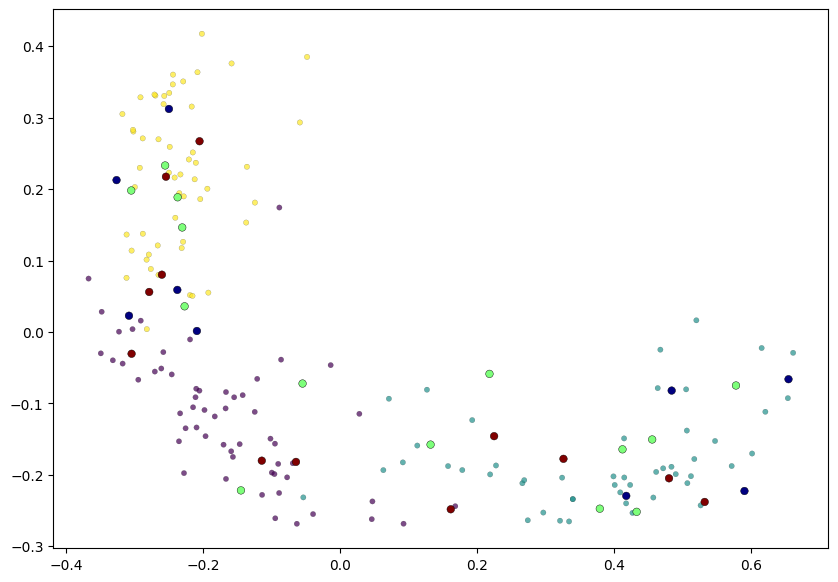

In [20]:
dataA_len, Re_testA_len = len(trainA), len(Re_testA)
print(f"Reconstruction loss for Test Data A {AutoEncA.score(Re_testA)[1]}")
AutoEncA.plot(trainA, train_labels[:dataA_len], Re_testA, test_labels[:Re_testA_len])
# print(Re_testA.shape)

In [21]:
print(type(Re_testA))
print(type(Re_trainA))
print(Re_testA.shape)
print(Re_trainA.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(35, 4)
(154, 4)


### Data B

Reconstruction loss for Test Data B {'MSE': 0.005400128737426707, 'transform_time': 0.012102603912353516, 'rec_time': 0.0017549991607666016}


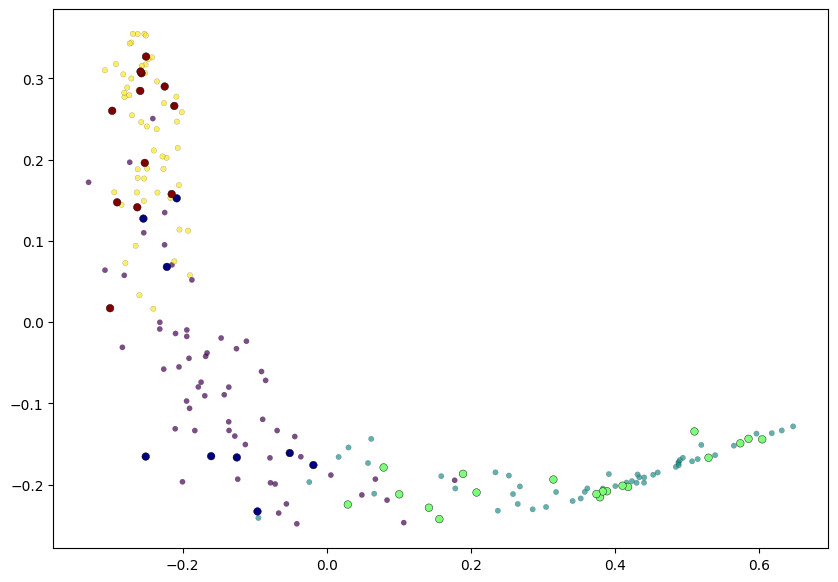

(40, 3)

In [22]:
dataB_len, testB_len = len(trainB), len(testB)
print(f"Reconstruction loss for Test Data B {AutoEncB.score(testB)[1]}")
AutoEncB.plot(trainB, train_labels[:dataB_len], testB, test_labels[:testB_len])
testB.shape

In [23]:
values=[]
mse_s=[]
print(trainB.shape[0])
# After running first time clear array
for y in range(testB.shape[0]):
    for x in range(testB.shape[1]):
        test_val=testB[y][x]
        train_val=trainB[y][x]
        point_val=abs(train_val-test_val)
        #print(point_val)
        values.append(point_val)
        if x==testB.shape[1]-1:
            mse_one=(values[0]+values[1]+values[2])/3
            mse_s.append(mse_one)
            #print(f"MSE for block {mse_one}")
            for x in range(len(values)):
                values.pop()

# mse_one=(values[0]+values[1]+values[2]+values[3])/4
# print(mse_one)
print(len(mse_s))

159
40


In [24]:
for x in range(len(mse_s)):
    if mse_s[x]>=0.55:
        print(mse_s[x], x)

#Values for B are 16,31,34,35

0.7855004917129284 15
0.5611797942886669 18
0.705368819704781 26
0.658213531765932 33


In [25]:
temporray_list=list(testB)

# print(temporray_list)
# popping=temporray_list.pop()
# print(popping)

#With how indexing works we have to go back to front with removal.
del temporray_list[33]
del temporray_list[26]
del temporray_list[18]
del temporray_list[15]

temporray_train=list(trainB)
del temporray_train[33]
del temporray_train[26]
del temporray_train[18]
del temporray_train[15]

Re_trainB=np.array(temporray_train)
Re_testB=np.array(temporray_list)
print(len(Re_testB))
print(len(Re_trainB))

36
155


Re-run with the removed data.

In [26]:
values=[]
new_mse_s=[]

for y in range(Re_testB.shape[0]):
    for x in range(Re_testB.shape[1]):
        test_val=Re_testB[y][x]
        train_val=Re_trainB[y][x]
        point_val=abs(train_val-test_val)
        #print(point_val)
        values.append(point_val)
        if x==Re_testB.shape[1]-1:
            mse_one=(values[0]+values[1]+values[2])/3
            new_mse_s.append(mse_one)
            #print(f"MSE for block {mse_one}")
            for x in range(len(values)):
                values.pop()

# mse_one=(values[0]+values[1]+values[2]+values[3])/4
# print(mse_one)
print(len(new_mse_s))

for x in range(len(new_mse_s)):
    if new_mse_s[x]>=0.45:
        print(new_mse_s[x], x)

36
0.45195866807615753 0
0.48593580675990716 9
0.4993409098702462 31
0.5452097869399918 34


Reconstruction loss for Test Data B {'MSE': 0.004430932130525853, 'transform_time': 0.0030908584594726562, 'rec_time': 0.0}


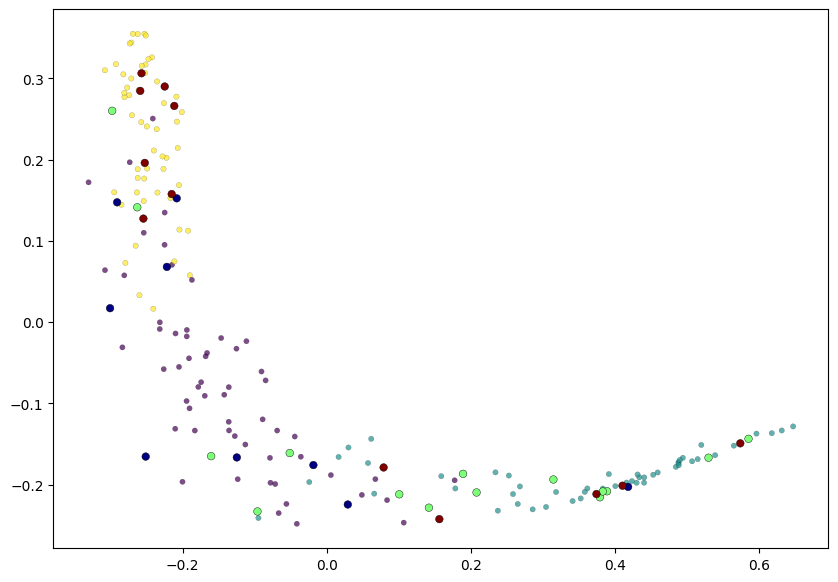

In [27]:
dataB_len, Re_testB_len = len(trainB), len(Re_testB)
print(f"Reconstruction loss for Test Data B {AutoEncB.score(Re_testB)[1]}")
AutoEncB.plot(trainB, train_labels[:dataB_len], Re_testB, test_labels[:Re_testB_len])

Refitting data with what we've taken out to see what (if anything changes)

In [28]:
# print(len(train_emb))
# print(len(trainA)+len(trainB))
# print(train_emb[0])
# print(train_emb[159])
print(train_emb)

[[-2.6751436913622179e-01  1.0784528887922654e-01]
 [-2.2661242277103574e-01 -8.2387314696072994e-02]
 [-8.3895870662092198e-02 -2.4706870313499088e-01]
 [-2.0957858560382558e-01  3.1885302144100534e-02]
 [-2.5098471984771642e-01  1.1624249053954137e-01]
 [-2.9940951605685601e-01 -3.6767483312452783e-02]
 [-1.6455412394701077e-01 -8.8886816612117781e-02]
 [-2.7678047507294790e-01  3.1697964947939505e-01]
 [ 7.6166566938274227e-02 -1.1000137808384435e-01]
 [ 3.3097626666397467e-01 -2.2736442122416969e-01]
 [-7.2948652282035786e-02 -2.0348665563450716e-01]
 [-1.8682184517607670e-01 -1.5262404945266125e-01]
 [ 3.2363347272500537e-01 -2.3314384614854572e-01]
 [ 3.7124508806995948e-01 -1.9902583133031926e-01]
 [ 5.1384869233056329e-01 -2.4668680936381693e-01]
 [-2.1924662967297567e-01  3.4127836017386920e-01]
 [ 4.1582051905282830e-01 -2.3676316250355184e-01]
 [-2.9867144798460182e-01  3.1074655542304142e-01]
 [-5.8567706668237123e-02  3.8408231824165584e-01]
 [-2.8943791900235200e-01  3.79

In [29]:
#This produces the values in the A training set.
trial=train_emb[:len(trainA)]

In [30]:
#This produces the values of the B training set
attempting=train_emb[len(trainA):]
print(attempting[0])
print(train_emb[0])

[-0.2672068325012438   0.07761290226298456]
[-0.2675143691362218   0.10784528887922654]


In [31]:
global i
i=0
for x in range(10):
    print(attempting[x][0], attempting[x])

for x in range(len(train_emb)):
    if train_emb[x][0]==-0.2672068325012438:
        print("It's a bit goofy")

-0.2672068325012438 [-0.2672068325012438   0.07761290226298456]
-0.193713327623831 [-0.193713327623831   -0.05564670524307237]
-0.011119496333082967 [-0.011119496333082967 -0.15154300320416159 ]
-0.15646312117798455 [-0.15646312117798455  0.09179724231593933]
-0.2029745628594118 [-0.2029745628594118   0.10275916396760171]
-0.12117701768105826 [-0.12117701768105826  0.09976193126297998]
-0.07399702535976214 [-0.07399702535976214   -0.0020405451639650025]
-0.18426663052373576 [-0.18426663052373576  0.30235086200069394]
0.06351774626325639 [ 0.06351774626325639 -0.09741048053466499]
0.31923784112687636 [ 0.31923784112687636 -0.20634743603560943]
It's a bit goofy


In [32]:
print(attempting[0])
print(trial[0])

for x in range(len(train_emb)):
    if train_emb[x][0]==-0.2672068325012438 and train_emb[x][1]==0.07761290226298456:
        print(train_emb[x], x)
    elif train_emb[x][0]==-0.2675143691362218 and train_emb[x][1]==0.10784528887922654:
        print(train_emb[x], x)

print(train_emb[0])

[-0.2672068325012438   0.07761290226298456]
[-0.2675143691362218   0.10784528887922654]
[-0.2675143691362218   0.10784528887922654] 0
[-0.2672068325012438   0.07761290226298456] 159
[-0.2675143691362218   0.10784528887922654]


In [33]:
temporray_list=list(train_emb)
final=len(temporray_list)-1

#Best guess right now is to just remove the same values that we removed in the earlier parts.
del temporray_list[192]
del temporray_list[185]
del temporray_list[177]
del temporray_list[174]
del temporray_list[22]
del temporray_list[21]
del temporray_list[20]
del temporray_list[6]
del temporray_list[5]
Re_train_emb=np.array(temporray_list)

In [34]:
AutoEncB = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEncB.fit(trainB, train_emb, anchors)

AutoEncB_2 = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEncB_2.fit(trainB, Re_train_emb, mod_anchors_B(Anchor_list=[mod_anchors_A(Anchor_list=[anchors],remove_points=points_A)],remove_points=points_B))

AutoEncB_3 = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEncB_3.fit(Re_trainB, Re_train_emb, anchors)

AutoEncB_4 = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEncB_4.fit(Re_trainB, Re_train_emb, mod_anchors_B(Anchor_list=[mod_anchors_A(Anchor_list=[anchors],remove_points=points_A)],remove_points=points_B))


In [35]:
AutoEncA = GRAEAnchor(lam=100, anchor_lam=100, relax=True, n_components = 2) #NOTE: try changing anchor_lam to other values! 
AutoEncA.fit(trainA, train_emb, anchors)

AutoEncA_2 = GRAEAnchor(lam=100, anchor_lam=100, relax=True, n_components = 2) #NOTE: try changing anchor_lam to other values! 
AutoEncA_2.fit(trainA, Re_train_emb, mod_anchors_B(Anchor_list=[mod_anchors_A(Anchor_list=[anchors],remove_points=points_A)],remove_points=points_B))

AutoEncA_3 = GRAEAnchor(lam=100, anchor_lam=100, relax=True, n_components = 2) #NOTE: try changing anchor_lam to other values! 
AutoEncA_3.fit(Re_trainA, Re_train_emb, anchors)

AutoEncA_4 = GRAEAnchor(lam=100, anchor_lam=100, relax=True, n_components = 2) #NOTE: try changing anchor_lam to other values! 
AutoEncA_4.fit(Re_trainA, Re_train_emb, mod_anchors_B(Anchor_list=[mod_anchors_A(Anchor_list=[anchors],remove_points=points_A)],remove_points=points_B))

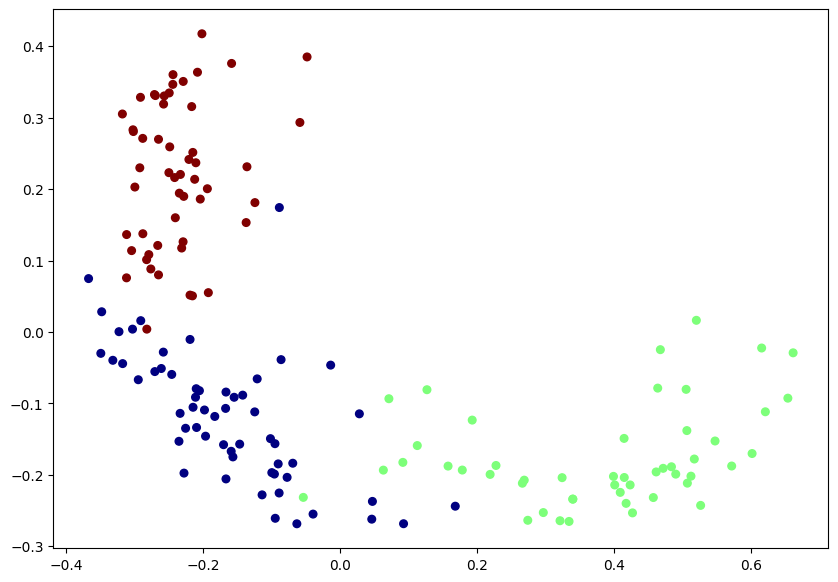

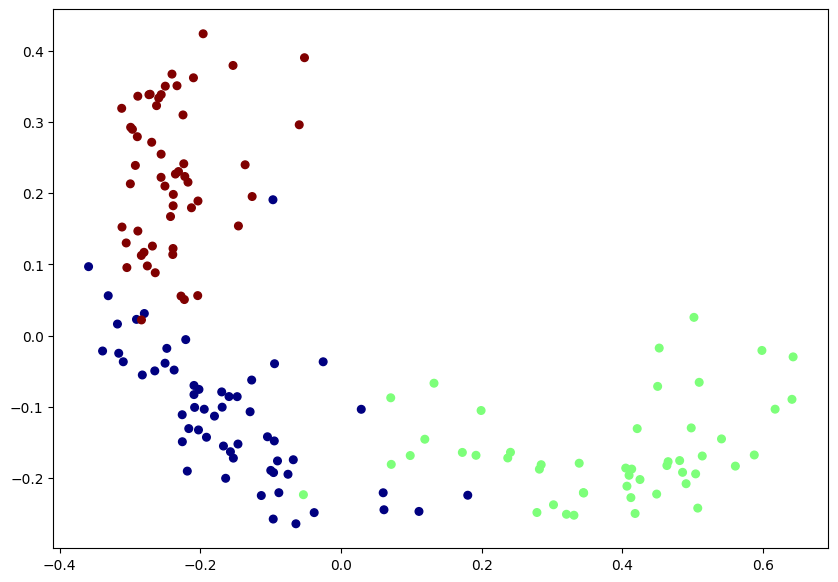

In [36]:
AutoEncA.plot(trainA,train_labels[:159])
AutoEncA_4.plot(trainA,train_labels[:159])

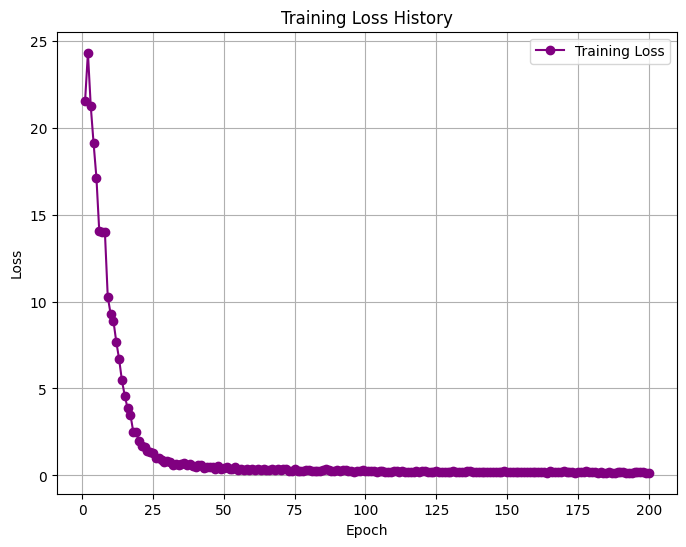

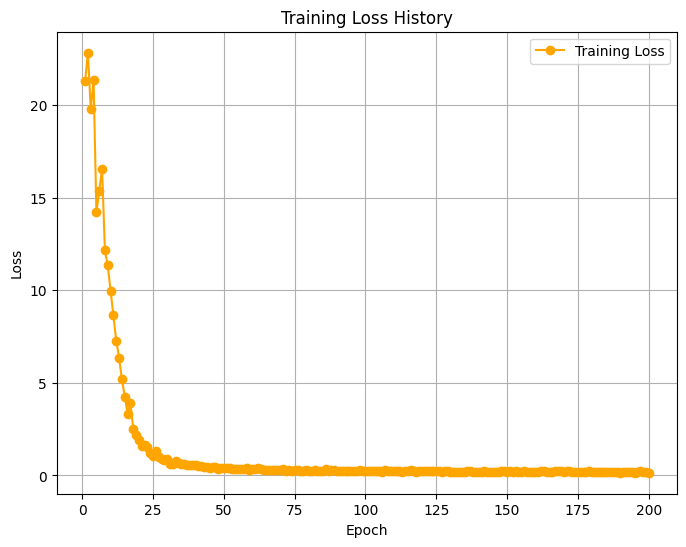

In [37]:
#Encoder A is the first run at encoding.  No adjustments to the training and anchors are made, A 2 modifies the anchors, A 3 modifies the training data
# A 4 will have both modified.

AutoEncA.plot_loss(color = "purple")
# AutoEncA_2.plot_loss(color = "green")
# AutoEncA_3.plot_loss(color="blue")
AutoEncA_4.plot_loss(color="orange")

plt.show()

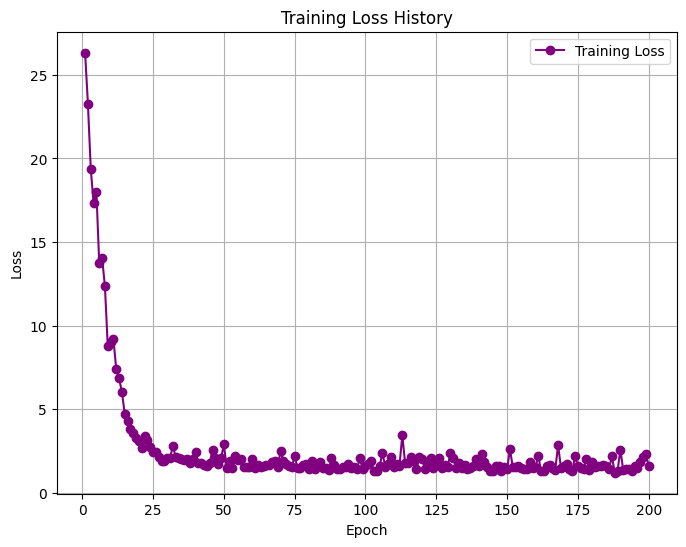

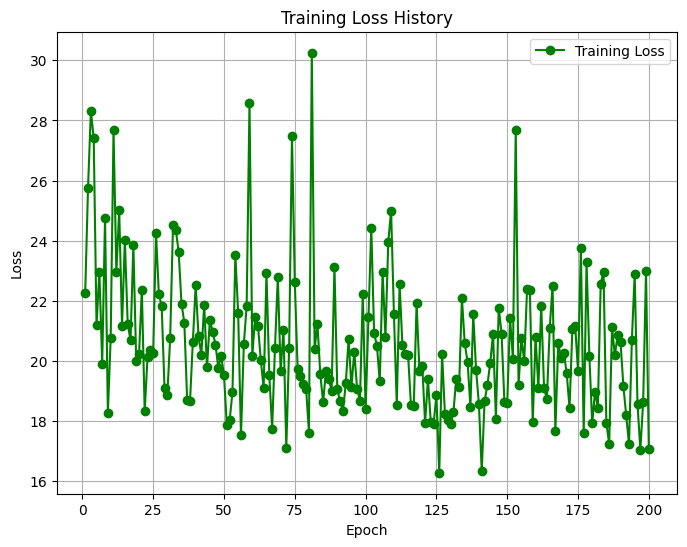

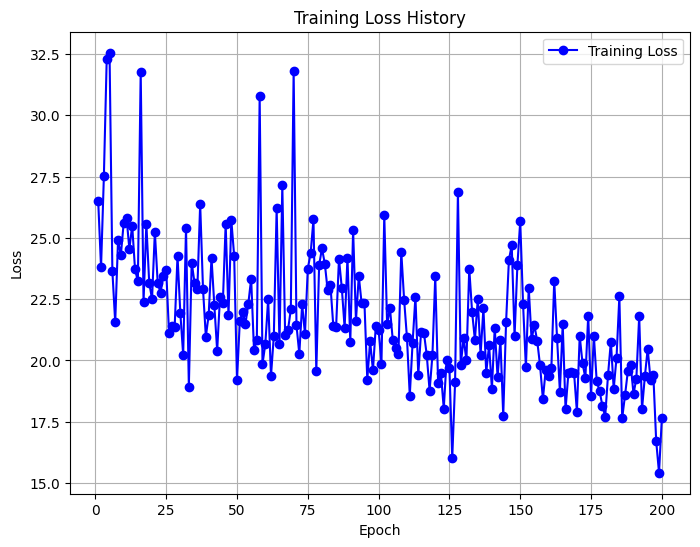

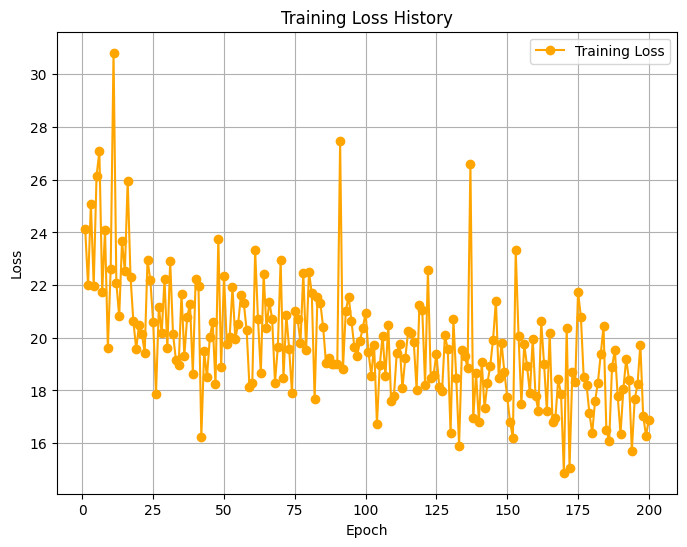

In [38]:
#Encoder B is the first run at encoding.  No adjustments to the training and anchors are made, B 2 modifies the anchors, B 3 modifies the training data
# B 4 will have both modified.

AutoEncB.plot_loss(color = "purple")
AutoEncB_2.plot_loss(color = "green")
AutoEncB_3.plot_loss(color="blue")
AutoEncB_4.plot_loss(color="orange")

plt.show()

## Domain Projections

In [ ]:
# Project A to B
A_to_Z = AutoEncA.transform(trainA) #NOTE: This is how you translate data from one domain to the other
A_to_B = AutoEncB.inverse_transform(A_to_Z)

# Plot the projections
plot_domains(data = A_to_B, labels = train_labels[:dataA_len], #NOTE: The data undergoes a PCA transformation before being plotted 
             title = "A to B Plotted over B", domain = trainB)

In [ ]:
# Project B to A
B_to_Z = AutoEncB.transform(trainB)
B_to_A = AutoEncA.inverse_transform(B_to_Z)

# Plot the projections
plot_domains(data = B_to_A, labels = train_labels[:dataB_len], 
             title = "B to A Plotted over A", domain = trainA)

# Glass Demonstration

## Data Loading and Autoencoder Fit

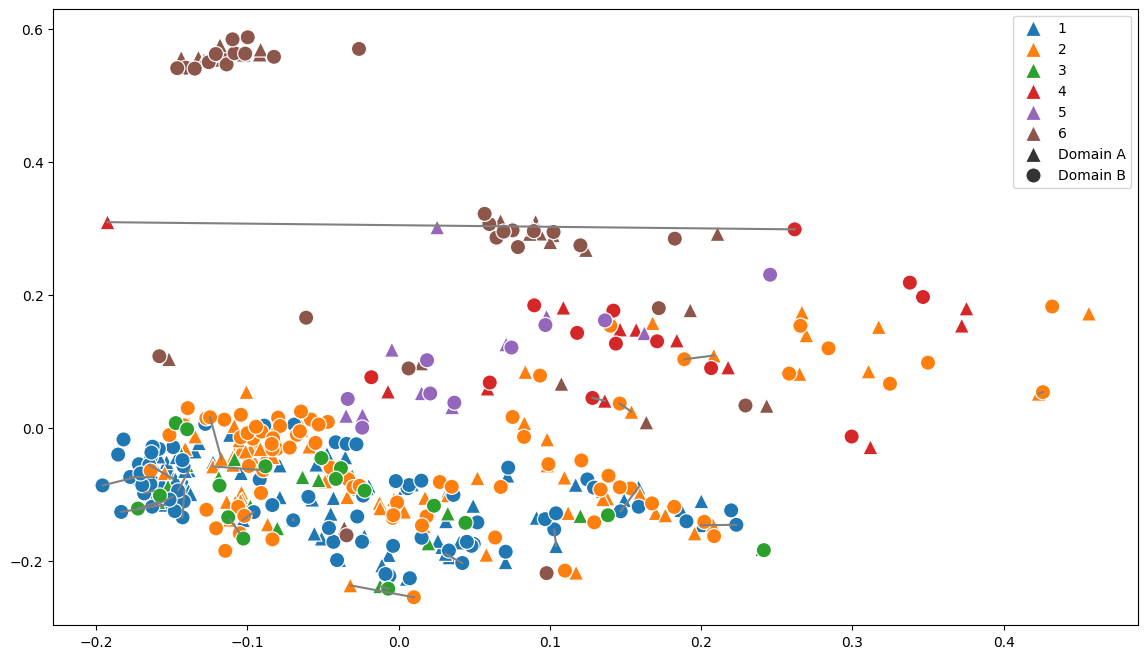

In [6]:
# from demonstration_utils.helpers import *
import numpy as np
PATH = "demonstration_utils/"

#Load in Seeds data
glass = np.load(PATH + "glass/emb.npy")
anchors = np.load(PATH + "glass/anchors.npy")
labels = np.load(PATH + "glass/labels.npy")

plot_embeddings(glass, np.hstack([labels, labels]), anchors)

In [ ]:
# First, we need to train the autoencoder
from AutoEncoders import GRAEAnchor

# Load in the data
train_emb = np.load(PATH + "glass/train_emb.npy")
trainA = np.load(PATH + "glass/trainA.npy")
trainB = np.load(PATH + "glass/trainB.npy")
testA = np.load(PATH + "glass/testA.npy")
testB = np.load(PATH + "glass/testB.npy")

train_labels = np.load(PATH + "glass/train_labels.npy")
test_labels = np.load(PATH + "glass/test_labels.npy")

# Train the autoencoders
AutoEncA = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEncA.fit(trainA, train_emb, anchors)

AutoEncB = GRAEAnchor(lam=100, anchor_lam=50, relax=False, n_components = 2)
AutoEncB.fit(trainB, train_emb, anchors)


AutoEncA.plot_loss(color = "orange")
AutoEncB.plot_loss(color = "violet")
plt.show()

MSE for B without taking values out.

In [ ]:
dataB_len, testB_len = len(trainB), len(testB)
# print(testB.shape)
# print(AutoEncA.score(testA).shape)
print(f"Reconstruction loss for Test Data B {AutoEncB.score(testB)[1]}")
AutoEncB.plot(trainB, train_labels[:dataB_len], testB, test_labels[:testB_len])

#We're getting a runtime error taht says the following: mat1 and mat2 shapes cannot be multiplied (43x9 and 4x800)
#The 43x9 is from testA.shape I can't figure out where the 4x800 is coming from.

MSE for A without taking values out.

In [ ]:
dataA_len, testA_len = len(trainA), len(testA)
print(testA.shape)
# print(AutoEncA.score(testA).shape)
print(f"Reconstruction loss for Test Data A {AutoEncA.score(testA)[1]}")
AutoEncA.plot(trainA, train_labels[:dataA_len], testA, test_labels[:testA_len])

In [ ]:
print(trainA.shape)
print(trainB.shape)
print(len(trainA))

global i
i=0
for x in range(len(trainA)):
    if trainA[x][6]==0:
        print(trainA[x])
        print(x)
        i+=1

print(i)


Things to know about this data set.  It's a 2D tuple.  First dimension has 171 objects in it and the second 9.  To harvest the MSE we should just need to take the code from what we've done above and adjust the numbers a bit.

Bellow is finding and removing values for data set B.

In [ ]:
values=[]
mse_s=[]
# After running first time clear array
for y in range(testB.shape[0]):
    for x in range(testB.shape[1]):
        test_val=testB[y][x]
        train_val=trainB[y][x]
        point_val=abs(train_val-test_val)
        #print(point_val)
        values.append(point_val)
        if x==testB.shape[1]-1:
            mse_one=(values[0]+values[1]+values[2]+values[3]+values[4]+values[5]+values[6]+values[7]+values[8])/9
            mse_s.append(mse_one)
            #print(f"MSE for block {mse_one}")
            for x in range(len(values)):
                values.pop()

# mse_one=(values[0]+values[1]+values[2]+values[3])/4
# print(mse_one)
print(len(mse_s))

for x in range(len(mse_s)):
    if mse_s[x]>=0.27:
        print(mse_s[x], x)

Both A and B for this data set have very low MSE to begin with when compared individually, nothing above .35 for A and only one above a .35 for B  The actual loss value for both of them are as follows:
A:  0.014670527285111232
B:  0.017626614055222044
Removing items from B

In [ ]:
temporray_list=list(testB)

#With how indexing works we have to go back to front with removal.
del temporray_list[41]
del temporray_list[19]
del temporray_list[5]
del temporray_list[1]

temporray_train=list(trainB)
del temporray_train[41]
del temporray_train[19]
del temporray_train[5]
del temporray_train[1]

Re_trainB=np.array(temporray_train)
Re_testB=np.array(temporray_list)
print(len(Re_testB))
print(len(Re_trainB))

MSE with removed values:

In [ ]:
dataB_len, Re_testB_len = len(trainB), len(Re_testB)
print(f"Reconstruction loss for Test Data B {AutoEncB.score(Re_testB)[1]}")
AutoEncB.plot(trainB, train_labels[:dataB_len], Re_testB, test_labels[:Re_testB_len])

Removing points from A

In [ ]:
values=[]
mse_s=[]
# After running first time clear array
for y in range(testA.shape[0]):
    for x in range(testA.shape[1]):
        test_val=testA[y][x]
        train_val=trainA[y][x]
        point_val=abs(train_val-test_val)
        #print(point_val)
        values.append(point_val)
        if x==testA.shape[1]-1:
            mse_one=(values[0]+values[1]+values[2]+values[3]+values[4]+values[5]+values[6]+values[7]+values[8])/9
            mse_s.append(mse_one)
            #print(f"MSE for block {mse_one}")
            for x in range(len(values)):
                values.pop()

# mse_one=(values[0]+values[1]+values[2]+values[3])/4
# print(mse_one)
print(len(mse_s))

for x in range(len(mse_s)):
    if mse_s[x]>=0.24:
        print(mse_s[x], x)

In [ ]:
temporray_list=list(testA)

#With how indexing works we have to go back to front with removal.
del temporray_list[41]
del temporray_list[19]
del temporray_list[5]
del temporray_list[1]

temporray_train=list(trainA)
del temporray_train[41]
del temporray_train[19]
del temporray_train[5]
del temporray_train[1]

Re_trainA=np.array(temporray_train)
Re_testA=np.array(temporray_list)
print(len(Re_testA))
print(len(Re_trainA))

In [ ]:
dataA_len, Re_testA_len = len(trainA), len(Re_testA)
# print(AutoEncA.score(testA).shape)
print(f"Reconstruction loss for Test Data A {AutoEncA.score(Re_testA)[1]}")
AutoEncA.plot(trainA, train_labels[:dataA_len], Re_testA, test_labels[:Re_testA_len])


## Domain Projections

In [ ]:
# Project A to B
A_to_Z = AutoEncA.transform(trainA)
A_to_B = AutoEncB.inverse_transform(A_to_Z)

# Plot the projections
plot_domains(data = A_to_B, labels = train_labels[:dataA_len], 
             title = "A to B Plotted over B", domain = trainB)

In [ ]:
# Project B to A
B_to_Z = AutoEncB.transform(trainB)
B_to_A = AutoEncA.inverse_transform(B_to_Z)

# Plot the projections
plot_domains(data = B_to_A, labels = train_labels[:dataB_len], 
             title = "B to A Plotted over A", domain = trainA)

# Diabetes Demonstration

## Data Loading and Autoencoder Fit

In [ ]:
from demonstration_utils.helpers import *
import numpy as np
PATH = "demonstration_utils/"

#Load in data
glass = np.load(PATH + "diabetes/emb.npy")
anchors = np.load(PATH + "diabetes/anchors.npy")
labels = np.load(PATH + "diabetes/labels.npy")

plot_embeddings(glass, np.hstack([labels, labels]), anchors)

In [ ]:
# First, we need to train the autoencoder
#Heads up it takes over a minute to run.
from AutoEncoders import GRAEAnchor

# Load in the data
train_emb = np.load(PATH + "diabetes/train_emb.npy") 
trainA = np.load(PATH + "diabetes/trainA.npy")
trainB = np.load(PATH + "diabetes/trainB.npy")
testA = np.load(PATH + "diabetes/testA.npy")
testB = np.load(PATH + "diabetes/testB.npy")

train_labels = np.load(PATH + "diabetes/train_labels.npy")
test_labels = np.load(PATH + "diabetes/test_labels.npy")

# Train the autoencoders
AutoEncA = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEncA.fit(trainA, train_emb, anchors)

AutoEncB = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEncB.fit(trainB, train_emb, anchors)


AutoEncA.plot_loss(color = "orange")
AutoEncB.plot_loss(color = "green")
plt.show()

## Standard Predictions

In [ ]:
dataA_len, testA_len = len(trainA), len(testA)
print(f"Reconstruction loss for Test Data A {AutoEncA.score(testA)[1]}")
AutoEncA.plot(trainA, train_labels[:dataA_len], testA, test_labels[:testA_len])

Adjusting A

In [ ]:
print(testA.shape)

In [ ]:
values=[]
mse_s=[]
# After running first time clear array
for y in range(testA.shape[0]):
    for x in range(testA.shape[1]):
        test_val=testA[y][x]
        train_val=trainA[y][x]
        point_val=abs(train_val-test_val)
        #print(point_val)
        values.append(point_val)
        if x==testA.shape[1]-1:
            mse_one=(values[0]+values[1]+values[2]+values[3]+values[4]+values[5]+values[6]+values[7])/8
            mse_s.append(mse_one)
            #print(f"MSE for block {mse_one}")
            for x in range(len(values)):
                values.pop()

# mse_one=(values[0]+values[1]+values[2]+values[3])/4
# print(mse_one)
print(len(mse_s))
print(trainA.shape)
for x in range(len(mse_s)):
    if mse_s[x]>=0.5:
        print(mse_s[x], x)
        

In [ ]:
temporray_list=list(testA)

#With how indexing works we have to go back to front with removal.
del temporray_list[153]
del temporray_list[147]
del temporray_list[125]
del temporray_list[112]
del temporray_list[101]
del temporray_list[100]
del temporray_list[98]
del temporray_list[94]
del temporray_list[92]
del temporray_list[70]
del temporray_list[52]
del temporray_list[46]
del temporray_list[36]
del temporray_list[20]
del temporray_list[0]

temporray_train=list(trainA)
del temporray_train[153]
del temporray_train[147]
del temporray_train[125]
del temporray_train[112]
del temporray_train[101]
del temporray_train[100]
del temporray_train[98]
del temporray_train[94]
del temporray_train[92]
del temporray_train[70]
del temporray_train[52]
del temporray_train[46]
del temporray_train[36]
del temporray_train[20]
del temporray_train[0]

Re_trainA=np.array(temporray_train)
Re_testA=np.array(temporray_list)
print(len(Re_testA))
print(len(Re_trainA))

In [ ]:
dataA_len, Re_testA_len = len(trainA), len(Re_testA)
print(f"Reconstruction loss for Test Data A {AutoEncA.score(Re_testA)[1]}")
AutoEncA.plot(trainA, train_labels[:dataA_len], Re_testA, test_labels[:Re_testA_len])

In [ ]:
dataB_len, testB_len = len(trainB), len(testB)
print(f"Reconstruction loss for Test Data B {AutoEncB.score(testB)[1]}")
AutoEncB.plot(trainB, train_labels[:dataB_len], testB, test_labels[:testB_len])

In [ ]:
values=[]
mse_s=[]
# After running first time clear array
for y in range(testB.shape[0]):
    for x in range(testB.shape[1]):
        test_val=testB[y][x]
        train_val=trainB[y][x]
        point_val=abs(train_val-test_val)
        #print(point_val)
        values.append(point_val)
        if x==testB.shape[1]-1:
            mse_one=(values[0]+values[1]+values[2]+values[3]+values[4]+values[5]+values[6]+values[7])/8
            mse_s.append(mse_one)
            #print(f"MSE for block {mse_one}")
            for x in range(len(values)):
                values.pop()

# mse_one=(values[0]+values[1]+values[2]+values[3])/4
# print(mse_one)
global i
i=0
print(len(mse_s))
print(trainA.shape)
for x in range(len(mse_s)):
    if mse_s[x]>=0.342:
        print(mse_s[x], x)
        i+=1
print(i)

In [ ]:
temporray_list=list(testB)

#With how indexing works we have to go back to front with removal.
del temporray_list[153]
del temporray_list[147]
del temporray_list[143]
del temporray_list[134]
del temporray_list[126]
del temporray_list[125]
del temporray_list[112]
del temporray_list[101]
del temporray_list[100]
del temporray_list[98]
del temporray_list[92]
del temporray_list[70]
del temporray_list[52]
del temporray_list[46]
del temporray_list[36]

temporray_train=list(trainB)
del temporray_train[153]
del temporray_train[147]
del temporray_train[143]
del temporray_train[134]
del temporray_train[126]
del temporray_train[125]
del temporray_train[112]
del temporray_train[101]
del temporray_train[100]
del temporray_train[98]
del temporray_train[92]
del temporray_train[70]
del temporray_train[52]
del temporray_train[46]
del temporray_train[36]

Re_trainB=np.array(temporray_train)
Re_testB=np.array(temporray_list)
print(len(Re_testB))
print(len(Re_trainB))

In [ ]:
dataB_len, Re_testB_len = len(trainB), len(Re_testB)
print(f"Reconstruction loss for Test Data B {AutoEncA.score(Re_testA)[1]}")
AutoEncA.plot(trainB, train_labels[:dataB_len], Re_testB, test_labels[:Re_testB_len])

## Domain Projections

In [ ]:
# Project A to B
A_to_Z = AutoEncA.transform(trainA)
A_to_B = AutoEncB.inverse_transform(A_to_Z)

# Plot the projections
plot_domains(data = A_to_B, labels = train_labels[:dataA_len], 
             title = "A to B Plotted over B", domain = trainB)

In [ ]:
# Project B to A
B_to_Z = AutoEncB.transform(trainB)
B_to_A = AutoEncA.inverse_transform(B_to_Z)

# Plot the projections
plot_domains(data = B_to_A, labels = train_labels[:dataB_len], 
             title = "B to A Plotted over A", domain = trainA)